In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data_frame['label'] = breast_cancer_dataset.target

In [5]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [6]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [9]:
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [10]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 12ms/step - loss: 0.8933 - accuracy: 0.4377 - val_loss: 0.5817 - val_accuracy: 0.6087
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6260 - accuracy: 0.6259 - val_loss: 0.3945 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4727 - accuracy: 0.7873 - val_loss: 0.2938 - val_accuracy: 0.9348
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3836 - accuracy: 0.8362 - val_loss: 0.2373 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3221 - accuracy: 0.8753 - val_loss: 0.2028 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2808 - accuracy: 0.8973 - val_loss: 0.1787 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2494 - accuracy: 0.9193 - val_loss: 0.1613 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

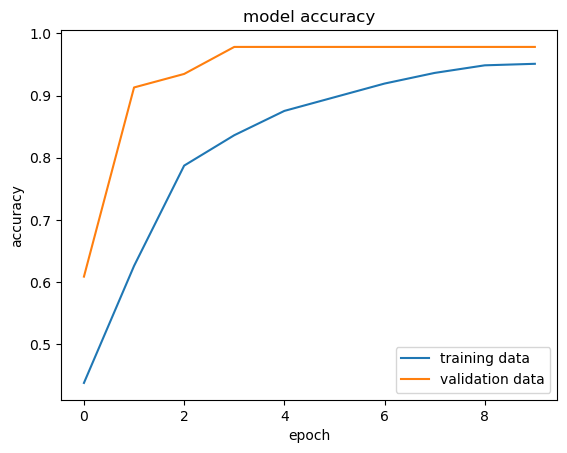

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

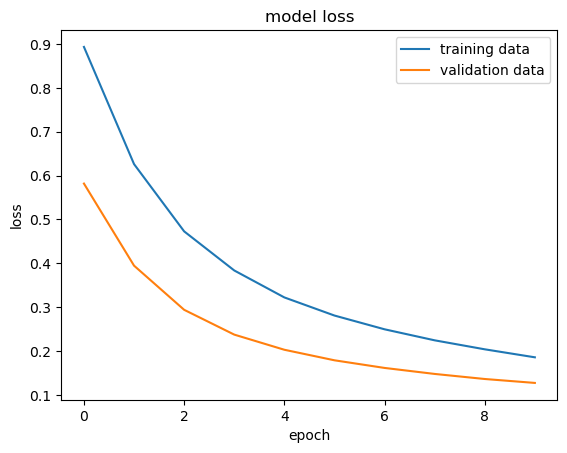

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'upper right')

In [15]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.9474
0.9473684430122375
